<a href="https://colab.research.google.com/github/anishdulal/Linear-Regression/blob/master/LinearRegression_28th_feb_absent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## First Step

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#open('/content/gdrive/My Drive/Price.csv')
price1 = pd.read_csv(open('/content/gdrive/My Drive/Price.csv'))
#price1 = pd.read_csv('Price.csv')

In [0]:
#Renaming title of columns
price = price1.rename(columns ={'कृषि उपज':'Name','ईकाइ':'Unit','न्यूनतम':'Min','अधिकतम':'Max','औसत':'Avg'})

def convert_value(column): #converting nepali numerical data into integers.
    r = []
    for i in column:
        #print(i)
        r.append(int(i))
    return r

price['Min'] = convert_value(price['Min'].tolist())
price['Max'] = convert_value(price['Max'].tolist())
price['Avg'] = convert_value(price['Avg'].tolist())

import datetime

price['cdate']=pd.to_datetime(price['cdate'])

dfw = price[price['pricetype'] == 'W']
dfr = price[price['pricetype'] == 'R']

In [0]:
dfr = dfr.reset_index()
dfr = dfr.set_index('cdate')
dfr.drop('index',axis=1, inplace = True)
dfr.head()

,Name,Unit,Min,Max,Avg,pricetype
cdate,,,,,,
2018-02-25,गोलभेडा ठूलो(नेपाली),के.जी.,40,50,45,R
2018-02-25,गोलभेडा सानो,के.जी.,40,50,45,R
2018-02-25,अालु रातो,के.जी.,35,40,38,R
2018-02-25,अालु सेतो,के.जी.,30,35,33,R
2018-02-25,प्याज सुकेको भारतीय,के.जी.,60,70,65,R


## Second Step

In [0]:
price.head()

,Name,Unit,Min,Max,Avg,cdate,pricetype
0,गोलभेडा ठूलो(नेपाली),के.जी.,30,35,33,2018-02-25,W
1,गोलभेडा सानो,के.जी.,25,30,28,2018-02-25,W
2,अालु रातो,के.जी.,20,23,22,2018-02-25,W
3,अालु सेतो,के.जी.,18,20,19,2018-02-25,W
4,प्याज सुकेको भारतीय,के.जी.,44,46,45,2018-02-25,W


In [0]:
vegetable = set(price['Name'].values) #taking all the unique vegetables
len(vegetable)

feature_df = [] #list

for v in vegetable:
  for p_type in ['W','R']:

    df_v = price[(price['Name'] == v) & (price['pricetype']== p_type)] #taking a vegetable of only one pricetype
    df_v = df_v.sort_values(by = ['cdate'], ascending = False) #sorting in descending order based on date. Recent date will be at first.

    if p_type == 'W':
      df_v['type'] = 1
    else:
      df_v['type'] = 0
    
    df_v['t_1'] = df_v.shift(-1)['Avg']
    df_v['t_2'] = df_v.shift(-2)['Avg']

    feature_df.append(df_v)


In [0]:
feature_df = pd.concat(feature_df)

In [0]:
feature_df.tail()

,Name,Unit,Min,Max,Avg,cdate,pricetype,type,t_1,t_2
2861,बोडी(तने),के.जी.,160,180,170,2018-03-19,R,0,125.0,170.0
2722,बोडी(तने),के.जी.,120,130,125,2018-03-18,R,0,170.0,170.0
2583,बोडी(तने),के.जी.,160,180,170,2018-03-17,R,0,170.0,190.0
2443,बोडी(तने),के.जी.,160,180,170,2018-03-16,R,0,190.0,NaN
2303,बोडी(तने),के.जी.,180,200,190,2018-03-15,R,0,NaN,NaN


In [0]:
feature_df.head()

,Name,Unit,Min,Max,Avg,cdate,pricetype,type,t_1,t_2
99163,पिंडालू,के.जी.,45,50,48,2020-02-15,W,1,48.0,48.0
98995,पिंडालू,के.जी.,45,50,48,2020-02-14,W,1,48.0,48.0
98832,पिंडालू,के.जी.,45,50,48,2020-02-13,W,1,48.0,48.0
98671,पिंडालू,के.जी.,45,50,48,2020-02-12,W,1,48.0,48.0
98511,पिंडालू,के.जी.,45,50,48,2020-02-11,W,1,48.0,48.0


In [0]:
feature_df.dropna(inplace=True)
feature_df.tail()

,Name,Unit,Min,Max,Avg,cdate,pricetype,type,t_1,t_2
3144,बोडी(तने),के.जी.,120,130,125,2018-03-21,R,0,125.0,170.0
3002,बोडी(तने),के.जी.,120,130,125,2018-03-20,R,0,170.0,125.0
2861,बोडी(तने),के.जी.,160,180,170,2018-03-19,R,0,125.0,170.0
2722,बोडी(तने),के.जी.,120,130,125,2018-03-18,R,0,170.0,170.0
2583,बोडी(तने),के.जी.,160,180,170,2018-03-17,R,0,170.0,190.0


In [0]:
feature_df = feature_df.sample(frac = 1, random_state= 1)

In [0]:
X = feature_df[['type', 't_1', 't_2']].values #getting featrue matrix
X

array([[  0.,  55.,  65.],
       [  1.,  19.,  19.],
       [  0.,  65.,  65.],
       ...,
       [  0., 195., 190.],
       [  1.,  78.,  78.],
       [  0.,  65.,  65.]])

In [0]:
X.shape

(98822, 3)

In [0]:
X = np.insert(X, 0, values=1, axis = 1) #adding bias or intercept term
X

array([[  1.,   0.,  55.,  65.],
       [  1.,   1.,  19.,  19.],
       [  1.,   0.,  65.,  65.],
       ...,
       [  1.,   0., 195., 190.],
       [  1.,   1.,  78.,  78.],
       [  1.,   0.,  65.,  65.]])

In [0]:
y = feature_df['Avg'].values
print(y.shape)

(98822,)


## Dividing into train, test and validation datas

In [0]:
total = len(X)
train = int(0.6 * total)
val = int(0.2*total)

X_train = X[:train]
y_train = y[:train].reshape(-1,1)

X_val = X[train:train + val]
y_val = y[train:train +val].reshape(-1,1)

X_test = X[train + val:]
y_test = y[train + val:].reshape(-1,1)

print(len(X_train), len(X_val),len(X_test))

59293 19764 19765


## Normalization
Min-max

In [0]:
#To cope with convergence problem during gradient descent, we take all our features into same range. 
X_train 

array([[  1.,   0.,  55.,  65.],
       [  1.,   1.,  19.,  19.],
       [  1.,   0.,  65.,  65.],
       ...,
       [  1.,   1., 115., 115.],
       [  1.,   0.,  65.,  65.],
       [  1.,   0., 190., 190.]])

In [0]:
price_X = X_train[:, 1:]

min_v = np.min(price_X)
max_v = np.max(price_X)
diff = max_v - min_v

In [0]:
def min_max_normalization(dataset):
  for i in range(0, dataset.shape[0]):
    for j in range(0, dataset.shape[1]):
      dataset[i][j] = (dataset[i][j]-min_v)/diff

min_max_normalization(X_train)
min_max_normalization(X_val)
min_max_normalization(X_test)

## Regression Model

In [0]:
np.random.seed(42)
theta = np.random.rand(4,1)
def ComputeCost(X_train, y_train, theta):
  m = len(X_train)
  J = (1/(2*m))*np.sum(np.square(np.dot(X_train,theta)-y_train))
  return J

In [0]:
X_train

array([[0.00061538, 0.        , 0.03384615, 0.04      ],
       [0.00061538, 0.00061538, 0.01169231, 0.01169231],
       [0.00061538, 0.        , 0.04      , 0.04      ],
       ...,
       [0.00061538, 0.00061538, 0.07076923, 0.07076923],
       [0.00061538, 0.        , 0.04      , 0.04      ],
       [0.00061538, 0.        , 0.11692308, 0.11692308]])

In [0]:
theta.shape

(4, 1)

In [0]:
X_train.shape

(59293, 4)

In [0]:
y_train.shape

(59293, 1)

In [0]:
len(X_train)

59293

In [0]:
theta

array([[0.37454012],
       [0.95071431],
       [0.73199394],
       [0.59865848]])

In [0]:
X_train[:,0]

array([0.00061538, 0.00061538, 0.00061538, ..., 0.00061538, 0.00061538,
       0.00061538])

In [0]:
ComputeCost(X_train,y_train, theta)

9053.068237634525

In [0]:
s = [2,1,5,7,3]
s[1] =10
s

[2, 10, 5, 7, 3]

In [0]:
def gradientDescent(X_train, y_train, theta, alpha, no_of_iterations):
  m = len(X_train)
  lossAtTrain =list()
  np.random.seed(42)
  theta = np.random.rand(4,1)
  for i in range(no_of_iterations):
    error = np.dot(X_train, theta) - y_train #(59293, 4) * (4, 1) = (59293,1)
    #temp0 = theta[0] - (alpha /m) * np.dot(error.T,X_train[:,0])
    #temp1 = theta[1] - ( alpha /m ) * np.dot(error.T,X_train[:,1])
    #temp2 = theta[2] - (alpha /m) * np.dot(error.T,X_train[:,2])
    #temp3 = theta[3] - ( alpha /m ) * np.dot(error.T,X_train[:,3])
    
    #theta[0] = temp0
    #theta[1] = temp1
    #theta[2] = temp2
    #theta[3] = temp3

    theta = theta - (alpha/m) * np.dot(X_train.T, error) #(4, 59293) * (59293,1) = (4,1)

    lossAtTrain.append(ComputeCost(X_train,y_train, theta))
   # print(theta)
  return theta,lossAtTrain

[[  6.96086452]
 [  3.86136191]
 [896.97561049]
 [718.8123131 ]]
[8834.049230402376, 8620.40067067764, 8411.99087208636, 8208.691377278103, 8010.376878748483, 7816.925141603195, 7628.21692821588, 7444.1359247334485, 7264.568669383523, 7089.404482539825, 6918.535398502397, 6751.856098950604, 6589.263848027932, 6430.658429018498, 6275.942082576335, 6125.019446469298, 5977.79749680049, 5834.18549067098, 5694.094910248455, 5557.439408207346, 5424.134754506781, 5294.098784473589, 5167.251348158325, 5043.51426093312, 4922.811255300888, 4805.067933886226, 4690.211723578968, 4578.17183080218, 4468.879197877029, 4362.266460457572, 4258.267906009296, 4156.819433305772, 4057.858512918489, 3961.3241486754823, 3867.1568400650276, 3775.298545561219, 3685.6926468488155, 3598.2839139253233, 3513.018471058792, 3429.8437635803393, 3348.70852549095, 3269.5627478625706, 3192.3576480140196, 3117.0456394427415, 3043.5803024938205, 2971.916355748244, 2902.0096281127035, 2833.8170315938, 2767.2965347398226, 2

Text(0, 0.5, 'Training Error')

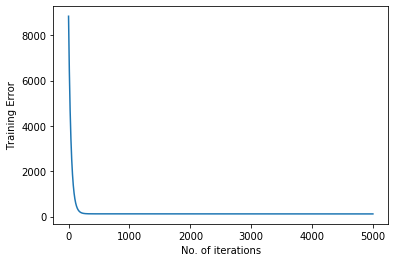

In [0]:
theta,lossAtTrain = gradientDescent(X_train, y_train, theta, alpha=0.9, no_of_iterations=5000)
print(theta)
print(lossAtTrain)
plt.plot(lossAtTrain)
plt.ticklabel_format(useOffset=False)
#plt.ylim(0,0.00003480487556)
plt.xlabel("No. of iterations")
plt.ylabel("Training Error")

In [0]:
theta.shape

(4, 1)

In [0]:
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)
print(X_test.shape)
print(y_test.shape)

(59293, 4)
(59293, 1)
(19764, 4)
(19764, 1)
(19765, 4)
(19765, 1)


## Class ko Solution

In [0]:
np.random.seed(42)
#HyperParameter
#Beautify Code by creating dictionary containing all hyperparameters

train_error=[]

param={
    'num_of_iteration':1000,
    'learning_rate':0.1
}

grid_param={
    'num_of_iteration':[5000,2000],
    'learning_rate':[0.1,0.9]
}

def MSE(h,y):
    return 0.5*np.average((h-y)**2)


In [0]:
#Now a grid is to be created which contains the combination of num_of_iteration and learning_rate. 
#Hyper Parameter Tuning
#This combination is fed to the function and the combination with the best result is our final value of hyperparameters

import itertools
grid=list(itertools.product(grid_param['num_of_iteration'],grid_param['learning_rate']))
print(grid)

for g in grid:
    p={
    'num_of_iteration':g[0],
    'learning_rate':g[1]
    }

[(5000, 0.1), (5000, 0.9), (2000, 0.1), (2000, 0.9)]


[9024.298132966564, 8914.430982738999, 8807.250085503647, 8702.689761546117, 8600.685937072205, 8501.176104941902, 8404.099286363487, 8309.39599352421, 8217.008193134696, 8126.879270864723, 8038.953996648561, 7953.178490838625, 7869.500191186703, 7787.867820632516, 7708.231355879869, 7630.541996741142, 7554.752136231351, 7480.815331393375, 7408.686274836605, 7338.320766971454, 7269.675688922736, 7202.708976105381, 7137.379592446209, 7073.647505236022, 7011.47366059656, 6950.819959547341, 6891.649234657646, 6833.925227269422, 6777.612565277062, 6722.676741450531, 6669.084092288464, 6616.801777388356, 6565.797759321146, 6516.0407839979, 6467.500361516528, 6420.146747476817, 6373.950924752346, 6328.884585708052, 6284.920114852644, 6242.030571915116, 6200.189675335107, 6159.371786156912, 6119.5518923172895, 6080.705593317456, 6042.809085269858, 6005.83914631057, 5969.773122368354, 5934.588913281696, 5900.264959255268, 5866.780227647575, 5834.114200081608, 5802.246859870706, 5771.1586797518

Text(0, 0.5, 'Training Error')

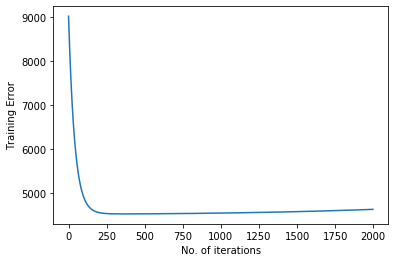

In [0]:
def train_model(X_train,y_train,X_val,y_val,param):
    np.random.seed(42)
    W=np.random.rand(X_train.shape[1]).reshape(-1,1)    #We reshape the row vector(1*4) to column vector(4*1)
    
    train_error=[]
    val_error=[]

    #Run the loop num_of_iteration times 
    for i in range(1,param['num_of_iteration']):
        h_train=np.matmul(X_train,W)        #h_train is matrix mul of X_train and W
        #sigmoid h_train = sigmoid(z= h_train)
        train_loss=MSE(h_train,y_train)     #loss in training data is calculated by calling MSE function
        #cross entropy
        train_error.append(train_loss)      #
        
        #Gradient-- Code form of the formula. shape[0] gives the number of rows
        gradient=np.matmul(np.transpose(h_train-y_train),X_train)/X_train.shape[0]    
            
        #W is the updated weight
        W=W-param['learning_rate']*gradient
    
    #Once training is done. We have to use Val set to tune hyper parameter. 
    #The p(combination) that gives least error is our final value for hyperparameters.
    h_val=np.matmul(X_val,W)# change
    val_loss=MSE(h_val,y_val) #change
    val_error.append(val_loss)
    return W, train_error, val_error
Weights, train_error, val_error = train_model(X_train,y_train,X_val,y_val,p)         

#Continue from here
print(train_error)
print('\n')                              
print(val_error)
plt.plot(np.arange(len(train_error)),train_error)
plt.xlabel("No. of iterations")
plt.ylabel("Training Error")
#plt.ylim(10**-5,10**-6)

In [0]:
for param in grid:
  def train_model(X_train,y_train,X_val,y_val,param):
      np.random.seed(42)
      W=np.random.rand(X_train.shape[1]).reshape(-1,1)    #We reshape the row vector(1*4) to column vector(4*1)
      print(W.shape)
      train_error=[]
      val_error=[]

      #Run the loop num_of_iteration times 
      for i in range(1,param['num_of_iteration']):
          h_train=np.matmul(X_train,W)        #h_train is matrix mul of X_train and W
          train_loss=MSE(h_train,y_train)     #loss in training data is calculated by calling MSE function
          train_error.append(train_loss)      #
          
          #Gradient-- Code form of the formula. shape[0] gives the number of rows
          gradient=np.matmul(X_train.T,(h_train-y_train))/X_train.shape[0]    
          #print(gradient.shape)
          #break   
          #W is the updated weight
          W=W-param['learning_rate']*gradient
          #print(gradient.shape)
          #break
      #Once training is done. We have to use Val set to tune hyper parameter. 
      #The p(combination) that gives least error is our final value for hyperparameters.
      h_val=np.matmul(X_val,W)
      val_loss=MSE(h_val,y_val)
      val_error.append(val_loss)
      return W #train_error, val_error

  #train_error, val_error = train_model(X_train,y_train,X_val,y_val,p)         

  #Continue from here
 # print(train_error)
 # print('\n')                            #The code is incomplete.
 # print(val_error)
  #plt.plot(np.arange(len(train_error)),train_error)
  #plt.xlabel("No. of iterations")
  #plt.ylabel("Training Error")
  #plt.show()
  #print(param)

## March 2nd : R2 score for model evaluation

In [0]:
final_param = {'num_of_iteration' : 5000,'learning_rate': 0.1}
model_weights =  train_model(X_train,y_train,X_val,y_val,final_param)

(4, 1)


In [0]:
# weights = np.array(model_weights)
y_mean = np.mean(y_test)
h_test = np.matmul(X_test, model_weights)
n = X_test.shape[0]
k = X_test.shape[1] - 1
SST = np.sum(np.square(y_test - y_mean))
SSR = np.sum(np.square(h_test- y_mean))
SSE = SST - SSR
print(SSE)
R2 = 1 - (SSE/(n-k-1))/(SST/(n-1))
R2

5107019.082455367


0.9611616355765833

In [0]:
X_test.shape,model_weights.shape,theta.shape,h_test.shape

((19765, 4), (4, 1), (4, 1), (19765, 1))

In [0]:
sse = np.sum(np.square(h_test - y_test))
sse

3806619.202117958